In [1]:
import pandas as pd

# Read Data

In [2]:
df = pd.read_csv("Customer_Segmentation.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


# Data Preprocessing

## Null Handling

In [4]:
df.fillna(method="ffill",inplace=True)

#### Subset Data

In [5]:
X = df.drop(['ID','Segmentation'],axis=1)

## Encoding

In [6]:
X = pd.get_dummies(X)
X.head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,38,1.0,3.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,67,1.0,1.0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,40,0.0,6.0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


## Scalling

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()

X_scaled = ss.fit_transform(X)

# Modelling

## K-Means

In [10]:
from sklearn.cluster import KMeans

In [18]:
kmeans = KMeans(n_clusters=5)

kmeans.fit(X)

labels = kmeans.labels_
print(labels)

[1 0 4 ... 0 1 0]


In [27]:
from matplotlib import markers
import matplotlib.pyplot as plt

cluster = [1,2,3,4,5,6,7,8,9,10]
inertia = []

for i in cluster:
    kmean = KMeans(n_clusters=i)
    kmean.fit(X)
    inertia.append(kmean.inertia_)



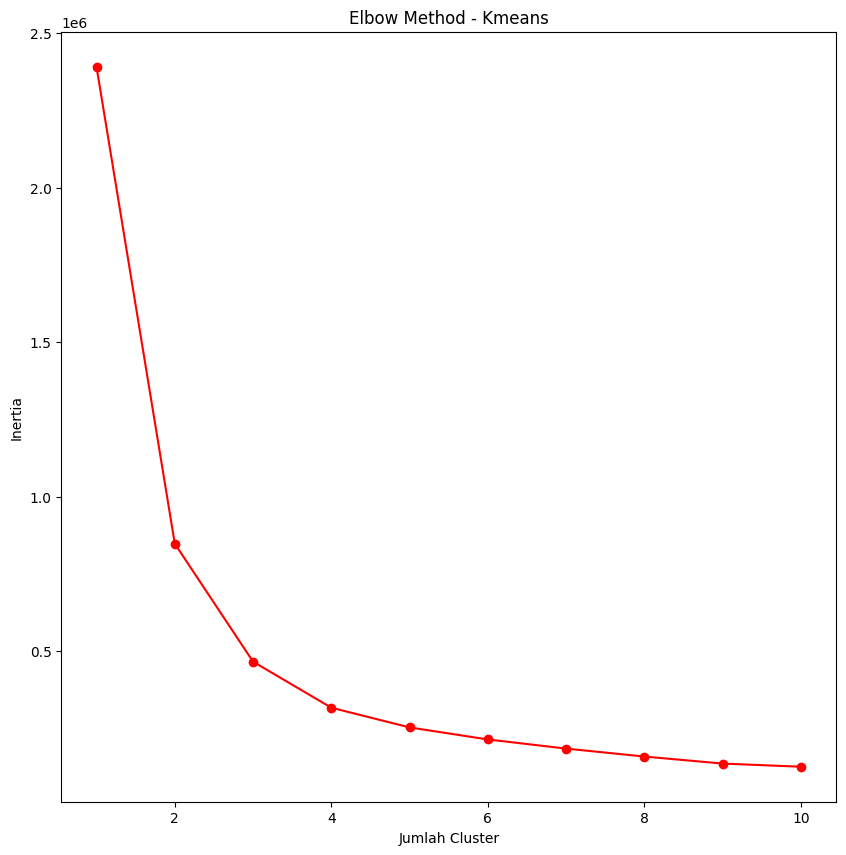

In [30]:
plt.figure(figsize=(10,10))

plt.plot(cluster,inertia,marker='o',color='red')

plt.title("Elbow Method - Kmeans")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.show()